In [1]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import acf, pacf

from drn_interactions.load import load_spikes, load_neurons
from drn_interactions.transforms import bin_spikes
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_spikes = load_spikes("pre")
neurons = load_neurons()

In [3]:
neurons.head(2)

,neuron_id,waveform_width,peak_asymmetry,mean_firing_rate,cv2_isi,recording_session_id,cluster_id,channel,is_single_unit,session_name,group_name,experiment_name
0,1,16.0,0.065574,0.601693,0.467315,3,0,6,1,ESHOCK_03_LOC1,shock,ESHOCK
1,4,9.0,0.037344,2.105512,0.824797,3,3,17,1,ESHOCK_03_LOC1,shock,ESHOCK


In [96]:
# session = np.random.choice(neurons["session_name"].unique())
# neurons_subset = neurons.loc[lambda x: x.session_name == session]["neuron_id"].sample(10)

# neurons_subset = neurons["neuron_id"].sample(50)
# neurons_subset = neurons.loc[lambda x: x.mean_firing_rate > 0.1]["neuron_id"].sample(100)


# max_time = 1200
# bin_width = 0.1


# df = df_spikes.loc[lambda x: (x.neuron_id.isin(neurons_subset)) & (x.spiketimes < max_time)].copy()
# df = bin_spikes(df, bin_width=bin_width, t_before=0, t_max=max_time)

<AxesSubplot:xlabel='neuron_id', ylabel='lag'>

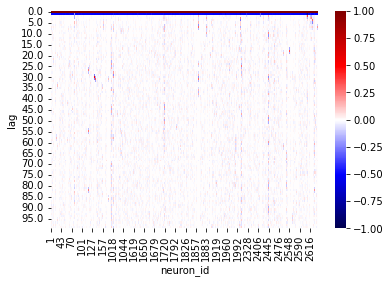

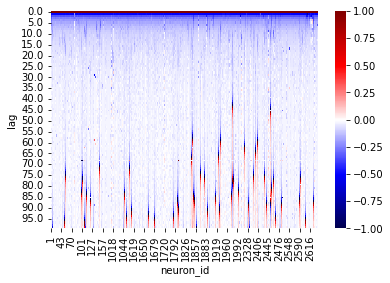

In [8]:
def get_acf(df, time_col="bin", value_col="counts", nlags=10, difference=False):
    ser = df.sort_values(time_col)[value_col]
    if difference:
        ser = ser.diff().dropna()
        nlags = nlags - 1 
    values = acf(ser, nlags=nlags, fft=True, adjusted=True)
    lags = np.arange(nlags + 1)
    return pd.DataFrame(dict(acf=values, lag=lags))


def get_pacf(df, time_col="bin", value_col="counts", nlags=10, difference=False):
    ser = df.sort_values(time_col)[value_col]
    if difference:
        ser = ser.diff().dropna()
        nlags = nlags - 1 
    values = pacf(ser, nlags=nlags)
    lags = np.arange(nlags + 1)
    return pd.DataFrame(dict(acf=values, lag=lags))


neurons_subset = neurons.loc[lambda x: x.mean_firing_rate > 0.1]["neuron_id"].sample(frac=1)

max_time = 60
bin_width = 0.01
nlags = 1 / bin_width


df = df_spikes.loc[lambda x: (x.neuron_id.isin(neurons_subset)) & (x.spiketimes < max_time)].copy()
df = bin_spikes(df, bin_width=bin_width, t_before=0, t_max=max_time)

plt.figure()
dfp = df.groupby("neuron_id").apply(get_acf, nlags=nlags, difference=True).reset_index().drop("level_1", axis=1)
dfp = dfp.pivot(index="lag", columns="neuron_id", values="acf")
sns.heatmap(dfp, cmap="seismic", vmin=-1, vmax=1)

plt.figure()
dfp = df.groupby("neuron_id").apply(get_pacf, nlags=nlags, difference=True).reset_index().drop("level_1", axis=1)
dfp = dfp.pivot(index="lag", columns="neuron_id", values="acf")
sns.heatmap(dfp, cmap="seismic", vmin=-1, vmax=1)

<AxesSubplot:xlabel='neuron_id', ylabel='lag'>

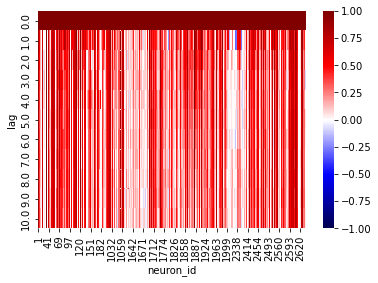

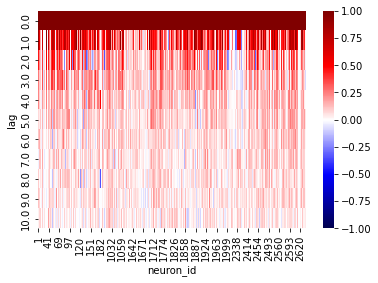

In [5]:
# max_time = 600
# bin_width = 0.1
# nlags =  / bin_width


df = df_spikes.loc[lambda x: (x.neuron_id.isin(neurons_subset)) & (x.spiketimes < max_time)].copy()
df = bin_spikes(df, bin_width=bin_width, t_before=0, t_max=max_time)

plt.figure()
dfp = df.groupby("neuron_id").apply(get_acf, nlags=nlags, difference=False).reset_index().drop("level_1", axis=1)
dfp = dfp.pivot(index="lag", columns="neuron_id", values="acf")
sns.heatmap(dfp, cmap="seismic", vmin=-1, vmax=1)

plt.figure()
dfp = df.groupby("neuron_id").apply(get_pacf, nlags=nlags, difference=False).reset_index().drop("level_1", axis=1)
dfp = dfp.pivot(index="lag", columns="neuron_id", values="acf")
sns.heatmap(dfp, cmap="seismic", vmin=-1, vmax=1)